In [24]:
import biom
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
table = biom.load_table("../../deblur_125nt_no_blooms_normed.biom")

In [6]:
table.ids()

array(['10317.000012326', '10317.000054127', '10317.000030973', ...,
       '10317.000038006', '10317.000038352', '10317.000038478'], dtype=object)

In [7]:
table.shape

(32954, 9511)

In [11]:
data = np.zeros(table.shape[::-1])

In [15]:
for i, idx in tqdm_notebook(enumerate(table.ids())):
    data[i] = table.data(idx)

A Jupyter Widget

In [16]:
np.save("../data", data)

In [122]:
data.shape

(9511, 32954)

In [123]:
data_c = data - data.sum(0)

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA()

In [127]:
pca.fit(data_c)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_.shape

(9511, 32954)

In [10]:
import pickle

In [12]:
pickle.dump(pca, open("../data/pca", 'wb'))

In [143]:
(np.log(pca.explained_variance_ratio_) > -12.5).sum()

1507

In [14]:
pca.explained_variance_ratio_

array([  1.43654346e-01,   7.01695229e-02,   5.17977851e-02, ...,
         6.63799296e-11,   5.84020056e-11,   8.11087163e-25])

In [27]:
explained_variance_sums = np.array([pca.explained_variance_ratio_[:i].sum() for i in range(len(pca.explained_variance_ratio_))])

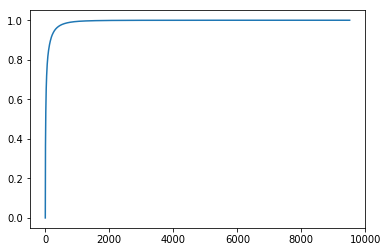

In [28]:
plt.plot(explained_variance_sums)

In [35]:
(explained_variance_sums < 0.9).sum()

165

In [34]:
np.save("../data/data_785_99", data[:,:785])

In [36]:
np.save("../data/data_165_90", data[:,:165])

## Try 1500 components

In [145]:
comp = pca.components_[:1500]

In [146]:
data_t = np.dot(data_c, comp.T)

In [148]:
np.save("../data/data_1500", data_t)

In [37]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### try with iris

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()['data']

In [5]:
iris = iris - iris.mean(0)

In [6]:
iris.shape

(150, 4)

In [7]:
def pi(X, c = 100):
    r = np.random.random(X.shape[1])
    r_prev = r
    for i in tqdm_notebook(range(c)):
        s = np.zeros_like(r)
        
        for j, row in tqdm_notebook(enumerate(X.T)):
            s[i] = np.dot(np.dot(row, X), r)
        
        r_prev = сr
        r = s / np.linalg.norm(s)
        if np.linalg.norm(r - r_prev) < 1e-7:
            print("breaking on iter ", i, "..")
            break
            
    
    return r

In [8]:
from multiprocessing import Pool

In [9]:
import pathos as ps

In [10]:
pool = ps.multiprocessing.Pool(4)

In [12]:
pool

In [15]:
def fast_pi(X, c = 100):
    import numpy as np
    r = np.random.random(X.shape[1])
    r_prev = r
    for i in tqdm_notebook(range(c)):
        s = np.zeros_like(r)
        
#         def map_f(i):
#             return default_map_f(i, X, r)
        
#         for j, row in tqdm_notebook(enumerate(X)):
#             #s += np.dot(row, r) * row
#             s += map_f(j)
    
        def default_map_f(i_, X_, r_):
            return np.dot(X_[i_], r_) * X[i_]

        pool = ps.multiprocessing.Pool(4)
        all_s = pool.map(lambda x:default_map_f(x, X, r), range(X.shape[0]))
        s = sum(all_s)
        pool.close()
        
        r_prev = r
        r = s / np.linalg.norm(s)
        if np.linalg.norm(r - r_prev) < 1e-7:
            print("breaking on iter ", i, "..")
            break
            
    
    return r

In [16]:
fast_pi(iris)

A Jupyter Widget

breaking on iter  5 ..



array([ 0.36158968, -0.08226889,  0.8565721 ,  0.35884393])

In [32]:
r

array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])

In [29]:
import matplotlib.pyplot as plt

In [51]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [102]:
sample = multivariate_normal.rvs((0,0,0), [[100,0,0],[0,1,0], [0,0,1]], 20)

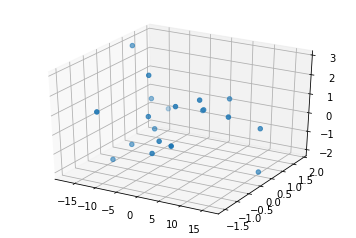

In [103]:
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.scatter(sample[:, 0], sample[:, 1], sample[:,2])


In [104]:
sample

array([[ -1.07952866e+01,  -1.48314201e+00,   1.37922750e+00],
       [  5.41042506e+00,   1.05936543e+00,   9.28888595e-01],
       [ -1.21825066e+01,  -7.27569143e-01,  -1.73799421e+00],
       [  1.08906995e+01,   1.54126042e-03,   9.56449896e-01],
       [  1.50354308e+01,   6.10966450e-01,   8.56225957e-02],
       [ -1.03284762e+01,  -2.67799189e-01,  -1.19408858e+00],
       [ -1.27550937e+01,   9.57312503e-01,   2.82167583e-01],
       [  2.40171393e-03,  -1.17535212e+00,  -5.26707839e-01],
       [  9.85116477e-01,  -4.00300564e-01,   1.36844407e+00],
       [ -1.74042191e+01,   9.96946992e-01,   2.86073286e+00],
       [ -1.38728858e+01,   1.85573066e+00,  -9.47426225e-01],
       [ -4.94762130e+00,  -4.75568015e-01,   6.63031340e-01],
       [  4.12151148e+00,   2.60205830e-02,   1.52949128e+00],
       [  4.54444331e-01,  -9.68233043e-01,  -2.82973632e-02],
       [ -6.94936333e+00,   1.02701527e-01,  -4.87511500e-01],
       [  6.50951114e+00,  -1.52895959e+00,   4.1337037

In [105]:
pca2 = PCA()

In [106]:
sample_c = sample - sample.mean(0)

In [108]:
pca2.fit(sample_c)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [109]:
pca2.components_

array([[ 0.99982971, -0.00873292, -0.01625702],
       [ 0.01639497,  0.01596451,  0.99973814],
       [ 0.00847109,  0.99983442, -0.01610496]])

In [98]:
s = 0
for a, b in zip(pca2.components_[0], pca2.components_[1]):
    s += a*b

In [99]:
s

-6.9388939039072284e-18

In [110]:
pca2.explained_variance_

array([ 95.66248654,   1.58500491,   0.83705457])

In [112]:
sample_c_transformed = pca2.transform(sample_c)

In [114]:
pca2.components_[0]

array([ 0.99982971, -0.00873292, -0.01625702])

In [121]:
np.max(np.abs(np.dot(sample_c, pca2.components_[:].T) - sample_c_transformed))

4.4408920985006262e-16